In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
from plotly.graph_objs import Scatter, Figure, Layout, Histogram
init_notebook_mode(connected=True)
np.random.seed(68)
%matplotlib inline

In [2]:
df = pd.read_csv("performances.csv")

In [3]:
df.head()

,optim,n_functions,time,n_relations,size_max
0,True,1,0.046567,1000,10
1,False,1,0.056738,1000,10
2,True,2,0.072186,1000,10
3,False,2,0.085179,1000,10
4,True,3,0.376812,1000,10


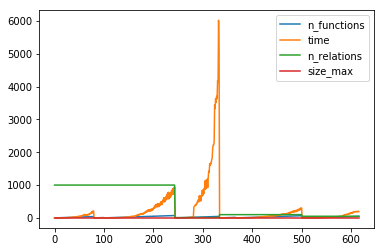

In [4]:
df.plot()

In [5]:
df_true = df[(df["optim"] == True) & (df["n_relations"] == 1000)].groupby(by="n_functions").agg(np.mean)
df_false = df[(df["optim"] == False) & (df["n_relations"] == 1000)].groupby(by="n_functions").agg(np.mean)

In [6]:
df_true.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72],
           dtype='int64', name='n_functions')

In [7]:
data1 = Scatter(x=df_true.index, y=df_true.time, name='With Rule Order Optimization')
data2 = Scatter(x=df_false.index, y=df_false.time, name='Without Rule Order Optimization')

In [23]:
layout = Layout(
    title='Comparisation Performance With Rule Order Optimization',
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Time of Computation (in s)',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    )
)
fig = Figure(data=[data2, data1], layout=layout)
iplot(fig)

In [9]:
data3 = Scatter(x=df_true.index, y=(np.array(df_false.time)-np.array(df_true.time)))

In [10]:
iplot([data3])

In [11]:
dt = (np.array(df_false.time)-np.array(df_true.time))

In [12]:
window_size = 5
dt_smooth = []

In [13]:
for i in range(len(dt) - window_size):
    dt_smooth.append(dt[i:i+5].mean())

In [14]:
data4 = Scatter(x=np.array(range(len(dt_smooth))), y=dt_smooth)

In [15]:
iplot([data4])

In [26]:
df10 = df[(df["n_relations"] == 10)].groupby(by="n_functions").agg(np.mean)
df50 = df[(df["n_relations"] == 50)].groupby(by="n_functions").agg(np.mean)
df100 = df[(df["n_relations"] == 100)].groupby(by="n_functions").agg(np.mean)
df1000 = df[(df["n_relations"] == 1000)].groupby(by="n_functions").agg(np.mean)

In [27]:
data10 = Scatter(x=df10.index, y=df10.time, name="With 10 Relations")
data50 = Scatter(x=df50.index, y=df50.time, name="With 50 Relations")
data100 = Scatter(x=df100.index, y=df100.time, name="With 100 Relations")
data1000 = Scatter(x=df1000.index, y=df1000.time, name="With 1000 Relations")

In [28]:
layout = Layout(
    title='Comparisation Performance With the Total Number of Relations',
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Time of Computation (in s)',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    )
)
fig = Figure(data=[data10, data50, data100], layout=layout)
iplot(fig)